Exponential Growth Model

1 - Deterministic model

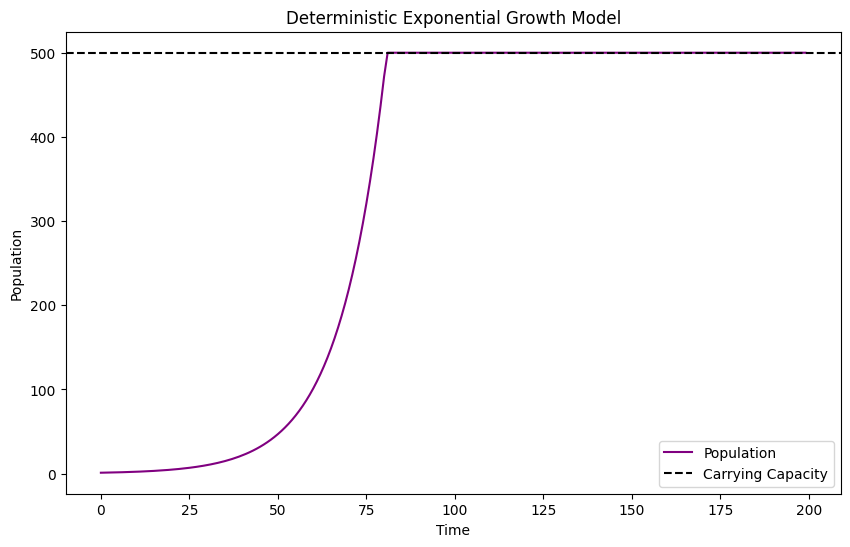

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def exp_growth_model(b, d, K, P0, time_steps, dt):
   
    r = b - d  #growth rate
    population = np.zeros(time_steps)
    population[0] = P0

    for t in range(1, time_steps):
        P = population[t-1]
        dP = r * P
        population[t] = P + dP
        if population[t] >= K:
            population[t:] = K
            break

    return population

def exp_growth_sol(b, d, K, P0, t):
    return K/(1+ (K-P0)/P0 * np.exp(-(b-d)*t))


def plot_population(population, K, time_steps):
   
    plt.figure(figsize=(10, 6))
    plt.plot(range(time_steps), population, color='purple', label='Population')
    plt.axhline(y=K, color='black', linestyle='--', label='Carrying Capacity')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Deterministic Exponential Growth Model')
    plt.legend()
    plt.show()

#Parameters
def model():
    b = 0.1  
    d = 0.02  
    K = 500  
    P0 = 1  
    time_steps = 200 
    dt = 1  

    population = exp_growth_model(b, d, K, P0, time_steps, dt)
    
    #Plot results
    plot_population(population, K, time_steps)

#Run main function
if __name__ == "__main__":
    model()


2 - Stochastic Model

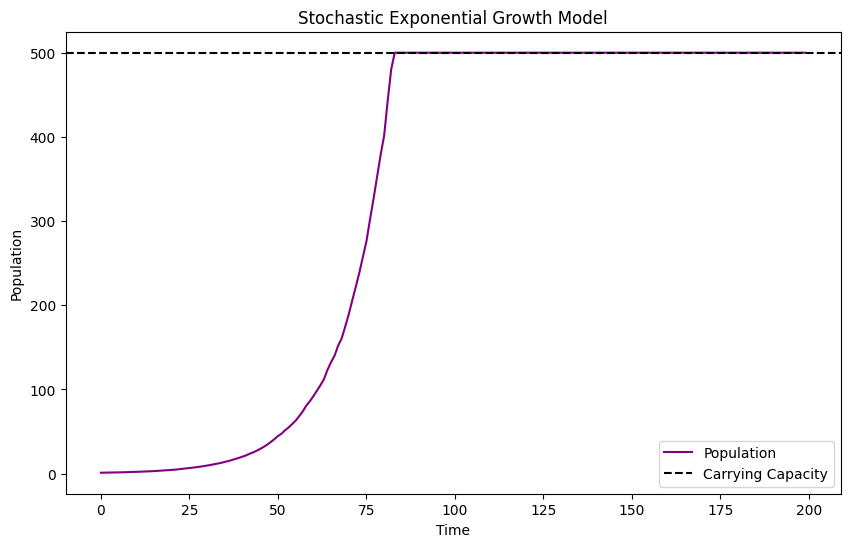

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def stochastic_exp_growth_model(b, d, K, P0, time_steps, dt, variability):
    r = b - d  # growth rate
    population = np.zeros(time_steps)
    population[0] = P0

    for t in range(1, time_steps):
        P = population[t-1]
        stochastic_r = r + np.random.normal(0, variability)
        dP = stochastic_r * P
        population[t] = P + dP
        if population[t] >= K:
            population[t:] = K
            break

    return population

def plot_population(population, K, time_steps):
    plt.figure(figsize=(10, 6))
    plt.plot(range(time_steps), population, color='purple', label='Population')
    plt.axhline(y=K, color='black', linestyle='--', label='Carrying Capacity')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Stochastic Exponential Growth Model')
    plt.legend()
    plt.show()

# Parameters
def model():
    b = 0.1  # birth rate
    d = 0.02  # death rate
    K = 500  # carrying capacity
    P0 = 1  # initial population
    time_steps = 200  # number of time steps
    dt = 1  # time step size
    variability = 0.01  # standard deviation of the growth rate variation

    population = stochastic_exp_growth_model(b, d, K, P0, time_steps, dt, variability)
    
    # Plot results
    plot_population(population, K, time_steps)

# Run main function
if __name__ == "__main__":
    model()


3 - deterministic exponential model multiple simulations

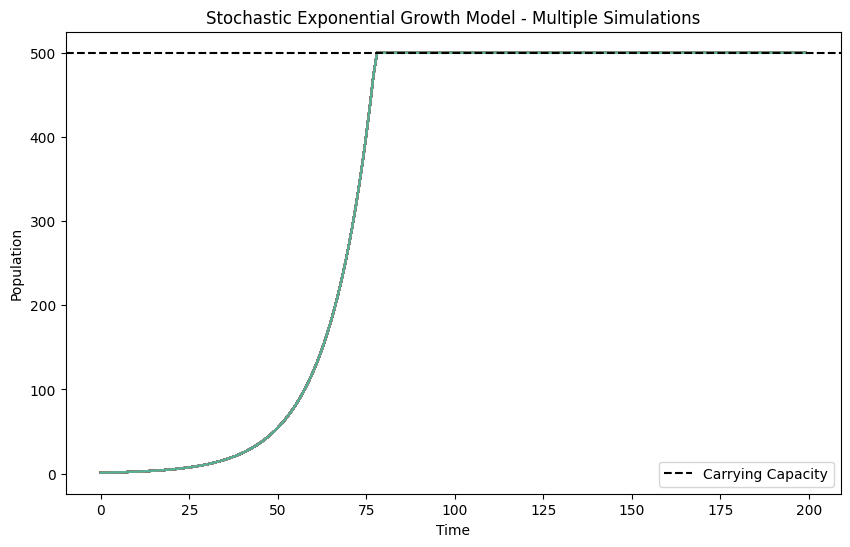

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def stochastic_exp_growth_model(b, d, K, P0, time_steps, dt, variability):
    #r = b - d  # mean growth rate


    population = np.zeros(time_steps)
    population[0] = P0
    

    for t in range(1, time_steps):
        P = np.exp((b - d)*t)
        #put equation here for deterministic logistic & remove if loop & dont need exponential function
        if P > K:
            P = K
        population[t] = P
        
        
    #    P = population[t-1]
    #    # Introduce stochasticity in the growth rate
    #    stochastic_r = r + np.random.normal(0, variability)
    #    dP = stochastic_r * P
    #    population[t] = P + dP
    #    if population[t] >= K:
    #        population[t:] = K
    #        break

    return population

#time steps and sim only first 20 = only will show first 20
def plot_simulations(simulations, K, time_steps):
    plt.figure(figsize=(10, 6))
    for sim in simulations:
        plt.plot(range(time_steps), sim, alpha=0.6)
    plt.axhline(y=K, color='black', linestyle='--', label='Carrying Capacity')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Stochastic Exponential Growth Model - Multiple Simulations')
    plt.legend()
    plt.show()

# Parameters
b = 0.1  # birth rate
d = 0.02  # death rate
K = 500  # carrying capacity
P0 = 1  # initial population
time_steps = 200  # number of time steps
dt = 1  # time step size
variability = 0.01  # standard deviation of the growth rate variation
num_simulations = 100  # number of simulations

# Run simulations
simulations = []
for _ in range(num_simulations):
    population = stochastic_exp_growth_model(b, d, K, P0, time_steps, dt, variability)
    simulations.append(population)

# Plot results
plot_simulations(simulations, K, time_steps)



4 - Deterministic vs Stochastic comparison

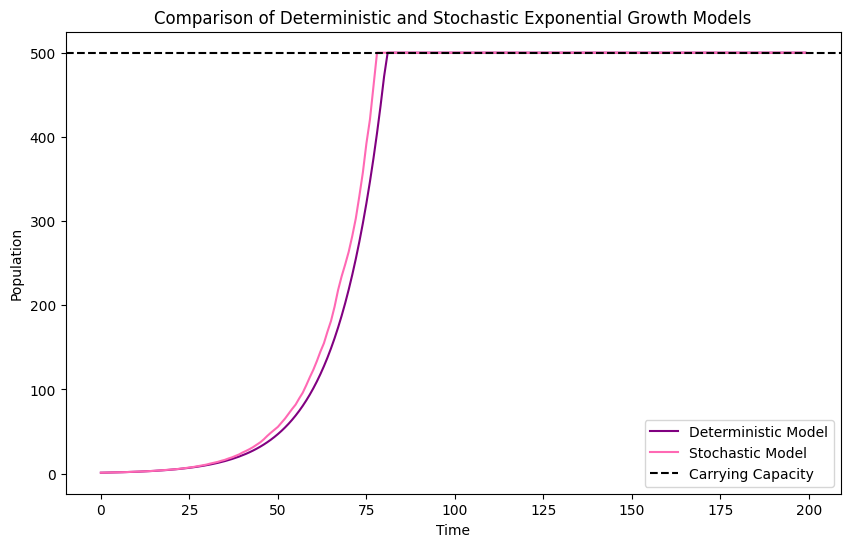

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Deterministic Model
def exp_growth_model(b, d, K, P0, time_steps, dt):
    r = b - d  # growth rate
    population = np.zeros(time_steps)
    population[0] = P0

    for t in range(1, time_steps):
        P = population[t-1]
        dP = r * P
        population[t] = P + dP
        if population[t] >= K:
            population[t:] = K
            break

    return population

# Stochastic Model
def stochastic_exp_growth_model(b, d, K, P0, time_steps, dt, variability):
    r = b - d  # growth rate
    population = np.zeros(time_steps)
    population[0] = P0

    for t in range(1, time_steps):
        P = population[t-1]
        stochastic_r = r + np.random.normal(0, variability)
        dP = stochastic_r * P
        population[t] = P + dP
        if population[t] >= K:
            population[t:] = K
            break

    return population

# Parameters for both 
b = 0.1  # birth rate
d = 0.02  # death rate
K = 500  # carrying capacity
P0 = 1  # initial population for both 
time_steps = 200  # number of time steps
dt = 1  # time step size
variability = 0.01  # standard deviation of growth rate variation for stochastic model

# Population data 
population_deterministic_same_start = exp_growth_model(b, d, K, P0, time_steps, dt)
population_stochastic_same_start = stochastic_exp_growth_model(b, d, K, P0, time_steps, dt, variability)

# Plotting both models 
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps), population_deterministic_same_start, color='purple', label='Deterministic Model')
plt.plot(range(time_steps), population_stochastic_same_start, color='hotpink', label='Stochastic Model')
plt.axhline(y=K, color='black', linestyle='--', label='Carrying Capacity')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Comparison of Deterministic and Stochastic Exponential Growth Models')
plt.legend()
plt.show()
